In [1]:
from PIL import Image
from pylab import *
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def readImagesAndTimes():
  # List of exposure times
    #times = np.array([ 1/675, 1/2641, 1/100 ], dtype=np.float32) #IMG_01 - IMG_03
    #times = np.array([ 1/60, 1/24, 0.1, 0.05 ], dtype=np.float32) #IMG_04 - IMG_07
    times = np.array([ 1/1491, 1/2802, 1/5438, 1/2889, 1/1445, 1/1849, 1/2101 ], dtype=np.float32) #IMG_08 - IMG_14
   
  # List of image filenames
    #filenames = ["images/IMG_01.jpg", "images/IMG_02.jpg", "images/IMG_03.jpg"]
    #filenames = ["images/IMG_04.jpg", "images/IMG_05.jpg", "images/IMG_06.jpg", "images/IMG_07.jpg"]
    filenames = ["images/IMG_08.jpg", "images/IMG_09.jpg", "images/IMG_10.jpg", "images/IMG_11.jpg", "images/IMG_12.jpg", "images/IMG_13.jpg", "images/IMG_14.jpg"]
    images = []
    for filename in filenames:
        im = cv2.imread(filename)
        images.append(im)
   
    return images, times

In [3]:
images,times = readImagesAndTimes()

In [4]:
# Align input images
alignMTB = cv2.createAlignMTB()
alignMTB.process(images, images)

In [5]:
# Obtain Camera Response Function (CRF)
calibrateDebevec = cv2.createCalibrateDebevec()
responseDebevec = calibrateDebevec.process(images, times)

In [6]:
# Merge images into an HDR linear image
mergeDebevec = cv2.createMergeDebevec()
hdrDebevec = mergeDebevec.process(images, times, responseDebevec)
# Save HDR image.
cv2.imwrite("hdrDebevec.hdr", hdrDebevec)

True

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


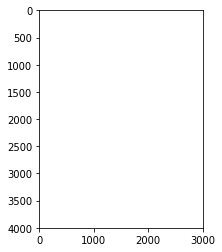

In [10]:
# Tonemap using Drago's method to obtain 24-bit color image
tonemapDrago = cv2.createTonemapDrago(1.0, 0.7)
ldrDrago = tonemapDrago.process(hdrDebevec)
ldrDrago = 3 * ldrDrago
#cv2.imwrite("ldr-Drago.jpg", ldrDrago * 255)
plt.imshow(ldrDrago*255)

In [8]:
# Tonemap using Durand's method obtain 24-bit color image
tonemapDurand = cv2.createTonemapDurand(1.5,4,1.0,1,1)
ldrDurand = tonemapDurand.process(hdrDebevec)
ldrDurand = 3 * ldrDurand
cv2.imwrite("ldr-Durand.jpg", ldrDurand * 255)

True

In [9]:
# Tonemap using Reinhard's method to obtain 24-bit color image
tonemapReinhard = cv2.createTonemapReinhard(1.5, 0,0,0)
ldrReinhard = tonemapReinhard.process(hdrDebevec)
cv2.imwrite("ldr-Reinhard.jpg", ldrReinhard * 255)

True

In [14]:
# Tonemap using Mantiuk's method to obtain 24-bit color image
tonemapMantiuk = cv2.createTonemapMantiuk(1.8,0.9, 1.0)
ldrMantiuk = tonemapMantiuk.process(hdrDebevec)
ldrMantiuk = 3 * ldrMantiuk
cv2.imwrite("ldr-Mantiuk.jpg", ldrMantiuk * 255)

True